In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Load the dataset
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_data_df = pd.read_csv(
    "Resources/lending_data.csv"
)

# Review the DataFrame
#display(lending_data_df.tail())

# Perform any necessary data cleaning and preprocessing
# For example, handling missing values and encoding categorical variables

# Define the feature matrix (X) and the target variable (y)
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_data_df['loan_status']

# Separate the X variable, the features
X = lending_data_df.drop('loan_status', axis=1)
# Import the train_test_learn module

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
models = {
    "Logistic Regression": LogisticRegression(random_state=1),
    "Decision Tree": DecisionTreeClassifier(random_state=1),
    "Random Forest": RandomForestClassifier(random_state=1),
    "SVM": SVC(random_state=1),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=1)
}

In [10]:
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    # Generate classification report
    report = classification_report(y_test, predictions)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, predictions)
    
    # Store the results
    results[model_name] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": cm
    }

c:\Users\jimco\anaconda3\envs\my_env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.9924680148576145
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.94      0.89       619

    accuracy                           0.99     19384
   macro avg       0.92      0.97      0.94     19384
weighted avg       0.99      0.99      0.99     19384

Confusion Matrix:
 [[18655   110]
 [   36   583]]




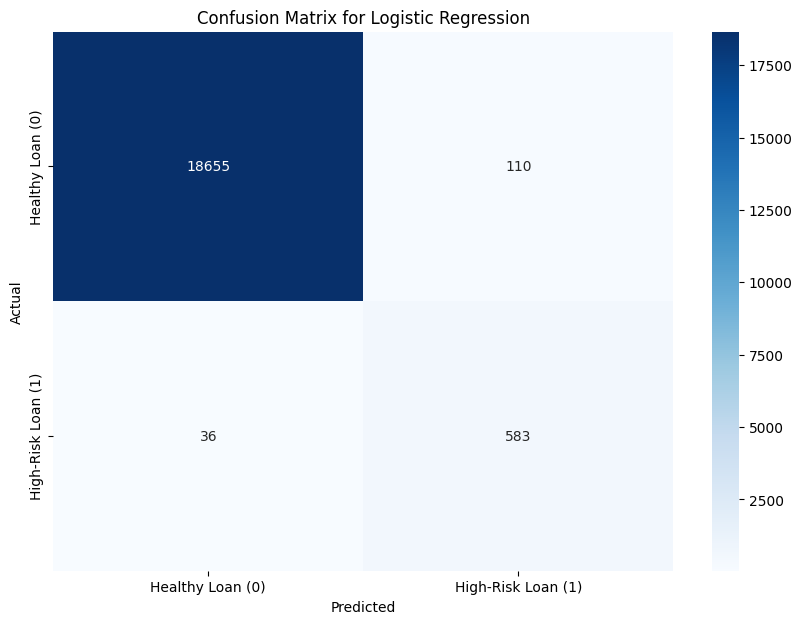

Model: Decision Tree
Accuracy: 0.990249690466364
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     18765
           1       0.84      0.85      0.85       619

    accuracy                           0.99     19384
   macro avg       0.92      0.92      0.92     19384
weighted avg       0.99      0.99      0.99     19384

Confusion Matrix:
 [[18667    98]
 [   91   528]]




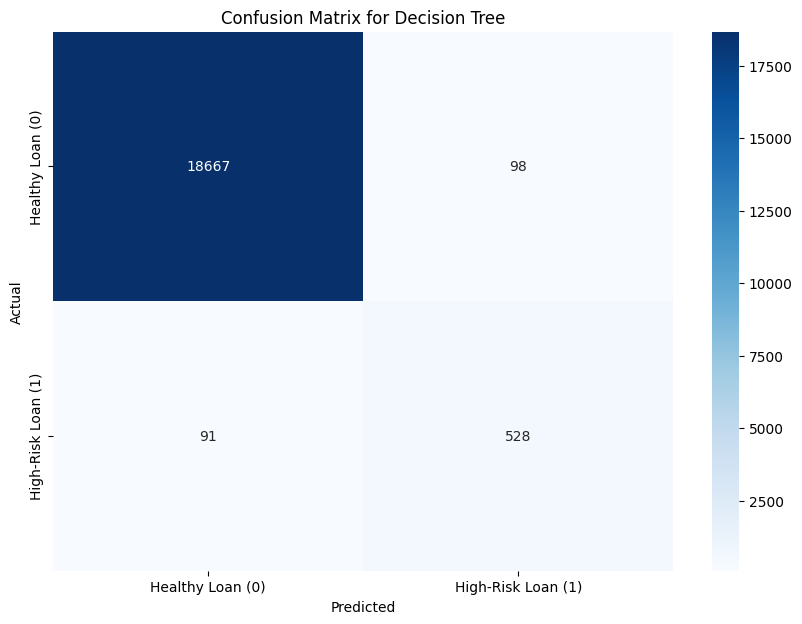

Model: Random Forest
Accuracy: 0.9914878250103177
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.89      0.87       619

    accuracy                           0.99     19384
   macro avg       0.92      0.94      0.93     19384
weighted avg       0.99      0.99      0.99     19384

Confusion Matrix:
 [[18666    99]
 [   66   553]]




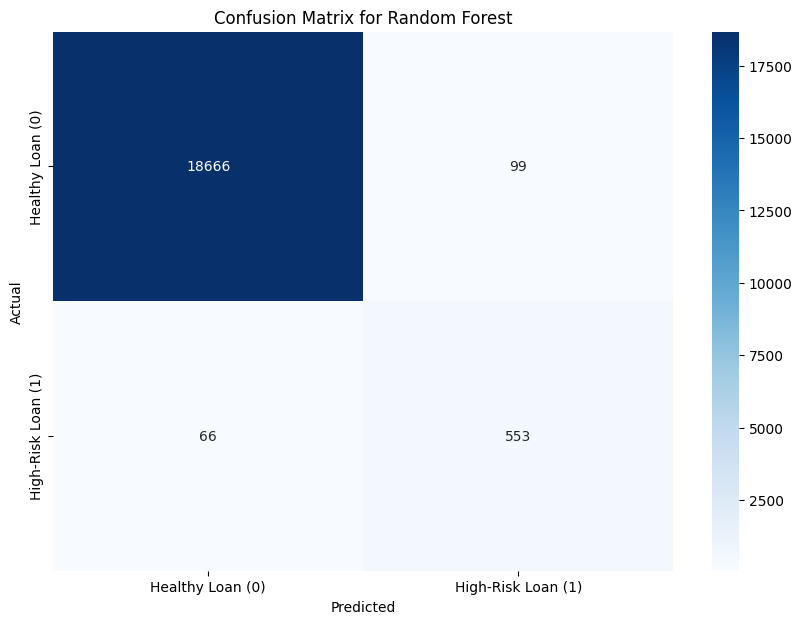

Model: SVM
Accuracy: 0.9938093272802311
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

Confusion Matrix:
 [[18651   114]
 [    6   613]]




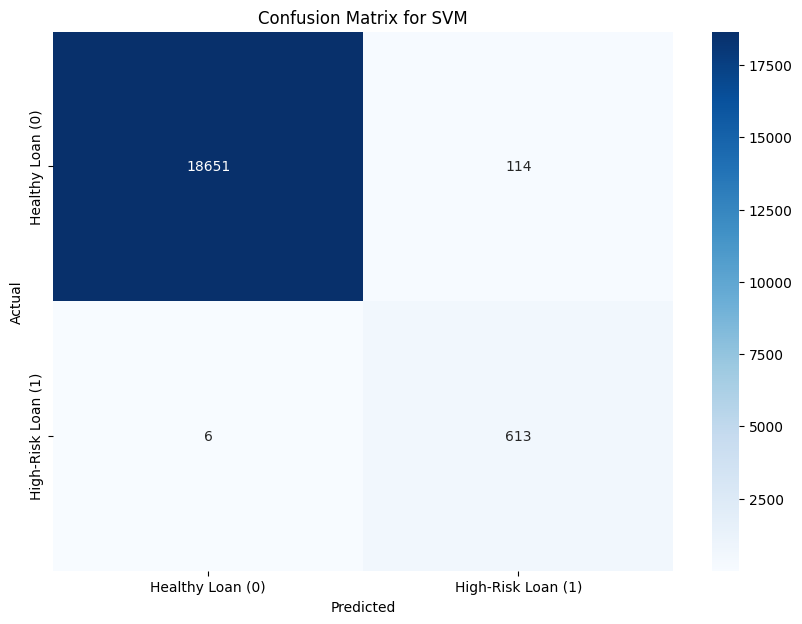

Model: KNN
Accuracy: 0.993293437886917
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.97      0.90       619

    accuracy                           0.99     19384
   macro avg       0.92      0.98      0.95     19384
weighted avg       0.99      0.99      0.99     19384

Confusion Matrix:
 [[18651   114]
 [   16   603]]




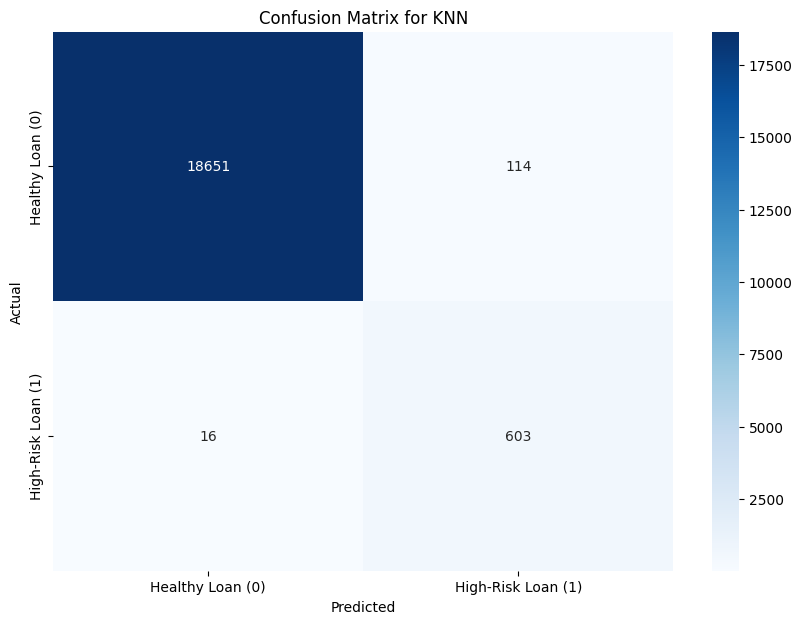

Model: Gradient Boosting
Accuracy: 0.9938609162195625
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384

Confusion Matrix:
 [[18652   113]
 [    6   613]]




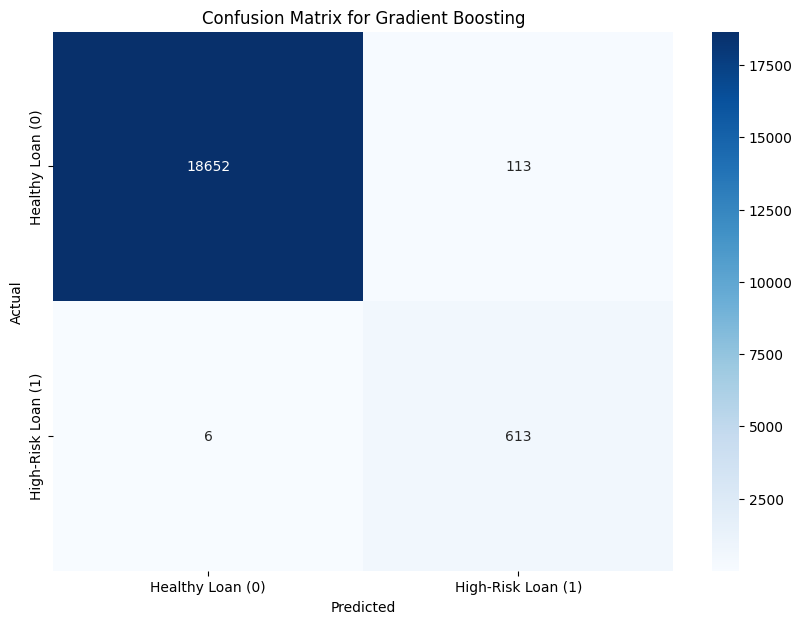

In [12]:
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['accuracy']}")
    print("Classification Report:\n", metrics['classification_report'])
    print("Confusion Matrix:\n", metrics['confusion_matrix'])
    print("\n" + "="*60 + "\n")
    # Visualize the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy Loan (0)', 'High-Risk Loan (1)'], yticklabels=['Healthy Loan (0)', 'High-Risk Loan (1)'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()